In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/Users/izualkernan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploring Precision/Recall and ROC Curves 

COE49412 

Imran Zualkernan

Spring 2020

In this notebook we explore how Precision/Recall and ROC Curves 
are actually derived from outputs of a neural network.


In [4]:
import numpy as np

In [18]:
## Implementing backpropagation
## Source: 
## https://medium.com/@a.mirzaei69/implement-a-neural-network-from-scratch-with-python-numpy-backpropagation-e82b70caa9bb
## comments added to the original code

import numpy as np

class NeuralNetwork(object):
    
    # The constructor takes 
    # 1. layers representing the number of nodes
    # 2. activations representing the activation functions to choose in
    #    each layer. 
    
    def __init__(self, layers = [2 , 10, 1], activations=['sigmoid', 'sigmoid']):
        
        # check to make sure that no. of layers is one more than 
        # no. of activation functions because the input layer 
        # has no activation function.
        
        assert(len(layers) == len(activations)+1)
        
        # define the local variables layers and activations
        self.layers = layers
        self.activations = activations
        
        # initialize weights and biases as two lists to hold
        # weights and biases for each layer
        
        self.weights = []
        self.biases = []
        
        # create random weights for biases and weights
        # for each of the layes.
        
        for i in range(len(layers)-1):
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))
    
    # do feedforward for x
    # where x is an input
    
    # return a list of a's and z's as expected.
    # a's and z's are layer by layer
    
    def feedforward(self, x):
        # make a copy of x
        a = np.copy(x)
        
        # this variable will contain all the z's
        z_s = []
        
        # this variable will contain all the a's
        # the output of the input layer is simply x which is the
        # input. So we initialize the a_s to contain a. 
        a_s = [a]
        
        # for each layer do
        for i in range(len(self.weights)):
            
            # retrieve the appropriate activation function
            activation_function = self.getActivationFunction(self.activations[i])
            
            # create z_s by z = w.a + b for each layer
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            
            # create z_a by a = f(row) -- 
            # note that we apply it to the last element only 
            # by using the -1 notation. We only want to apply
            # the activation function to the last layer just 
            # added.
            
            a = activation_function(z_s[-1])
            
            # keep track of the new activation or a_s 
            a_s.append(a)
            
            # return both z_s and a_s 
            # we will have z_s and a_s for each layer 
        return (z_s, a_s)

    
    # takes the y -- the actual answer, a's and z's and 
    # calculates the dLoss/dw and dLoss/db
    
    def backpropagation(self,y, z_s, a_s):
        
        # initialize list of dLoss/dw and dLoss/db
        dw = []  # dLoss/dw
        db = []  # dLoss/db
        
        # create an empty list of deltas, one for each weight
        deltas = [None] * len(self.weights)  # delta = dLoss/dz  known as error for each layer
        
        
        # start from the back and insert the last layer error
        # based on the square loss function. Note -1 is used to 
        # fill things from the back of the list 
        # also note that we need to use the derivative function 
        # for the activation function.
        # note that we do not need to use the 2 in the loss function derivation
        
        # again note this is for the last layer only!
        
        deltas[-1] = ((y-a_s[-1])*(self.getDerivitiveActivationFunction(self.activations[-1]))(z_s[-1]))
        
        
        # Perform BackPropagation
        
        # for the rest of the deltas, go in reverse order
        for i in reversed(range(len(deltas)-1)):
            deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(z_s[i]))        
        
        # now we need to update the weights based on the calculated
        # deltas
        
        #now we will determine the batch size from the first dimension 
        #of shape of y. We simply want to see how many test cases are there
        #for example there may be 10 y's; one for each x. 
        
        batch_size = y.shape[1]
        
        # determine the two derivatives by taking 
        # the average according to batch sizes 
    
        
        db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]
        dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
        
        # return the derivitives respect to weight matrix and biases
        return dw, db

    
    # Now we will write the main training function that uses
    # feedforward and backpropagation many times (called epochs)
    # lr (learning rate) is the eta in our equations.
    
    def train(self, x, y, batch_size=10, epochs=100, lr = 0.01):
    
    # update weights and biases based on the output
    # for the number of epochs
    
        for e in range(epochs): 
            i=0
            
            # Do the training in batches
            # each batch is a subset of the original 
            # data 
            
            while(i<len(y)):
                
                # extract a batch
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                
                # update i for the next batches
                i = i+batch_size
                
                # do the feedforward for the batch and update the weights
                # based on the average loss for each weight for the whole
                # batch.
                
                z_s, a_s = self.feedforward(x_batch)
                
                # do the back propagation 
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                
                
                # update the weights for each pair of weights and dw
                # and biases and db
                
                self.weights = [w+lr*dweight for w,dweight in  zip(self.weights, dw)]
                self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
                
                # print the loss using a built in function 
                # to calculate the loss
                
                #print("loss = ", np.linalg.norm(a_s[-1]-y_batch) )
    
    
    # This function is being used to return an activation function 
    # depending on its weights
    
    @staticmethod
    def getActivationFunction(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(name == 'linear'):
            return lambda x : x
        elif(name == 'relu'):
            def relu(x):
                y = np.copy(x)
                y[y<0] = 0
                return y
            return relu
        else:
            print('Unknown activation function. linear is used')
            return lambda x: x
    
    # This function returns the derivative of a function depending
    # on its name.
    
    @staticmethod
    def getDerivitiveActivationFunction(name):
        if(name == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x)) 
        elif(name == 'linear'):
            return lambda x: 1
        elif(name == 'relu'):
            def relu_diff(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return relu_diff
        else:
            print('Unknown activation function. linear is used')
            return lambda x: 1     

In [61]:
# The purpose of this exercise is to try to model a 
# step function using the neural network called xy().

# Since the output of neural network is using sigmoid
# we will get a number between 0 and 1. The threshold
# function threshold(x,p) is used to force a value
# to either 0 or 1.


# use to define a step function - array function
# we want to use the neural network to model this 
# function

def xy(x):
    y = np.copy(x)
    y[y>=0.5] = 1
    y[y<0.5] = 0
    return y

# used to define a threshold -- array function
# threshold is p, if less than p y is 0
# otherwise y is 1
def threshold(x,p):
    y = np.copy(x)
    y[y<=p] = 0
    y[y>p] = 1
    return y

# generate X and y
X = np.random.rand(1000).reshape(1, -1)
y = xy(X)

In [179]:
nn = NeuralNetwork([1, 100, 1],activations=['sigmoid', 'sigmoid'])

# run_once will return the predicted values after training 
# NN on input (X) and expected output (y)

def run_once(X,y,p):
    # train for 1000 epochs
    nn.train(X, y, epochs=1000, batch_size=64, lr = .1)

    # calculate the prediction y for the input X
    _, a_s = nn.feedforward(X)

    ## transform the output to use the threshold
    ## p in this case. This will make the output 
    ## 0 or 1
    
    #a_s[-1] = np.apply_along_axis(threshold,0,a_s[-1],p)
    
    return(a_s[-1])

run_once(X,y,0.5)

array([[0.9364376 , 0.03050578, 0.02511642, 0.92468907, 0.82369299,
        0.58378764, 0.47552957, 0.04274506, 0.06073448, 0.11091192,
        0.28620557, 0.14687851, 0.37779856, 0.9286577 , 0.68778378,
        0.79642411, 0.8054318 , 0.6187895 , 0.07147288, 0.20200992,
        0.93845881, 0.87321724, 0.04845095, 0.94960115, 0.54781262,
        0.81138662, 0.31879064, 0.93289563, 0.16469   , 0.34108459,
        0.30124278, 0.17561451, 0.3266611 , 0.52896783, 0.48469268,
        0.02374083, 0.06368363, 0.95039195, 0.74214672, 0.92346187,
        0.12341951, 0.96382043, 0.43540561, 0.64169435, 0.94776366,
        0.88112708, 0.63105448, 0.79197782, 0.03663611, 0.03856711,
        0.75594485, 0.82301436, 0.27916874, 0.08824218, 0.95144949,
        0.95989979, 0.94632925, 0.76618917, 0.1663844 , 0.84468264,
        0.90892518, 0.69284109, 0.83036715, 0.47694032, 0.67364436,
        0.84711042, 0.76886536, 0.08712348, 0.94629817, 0.05444137,
        0.60713291, 0.15792744, 0.20383663, 0.95

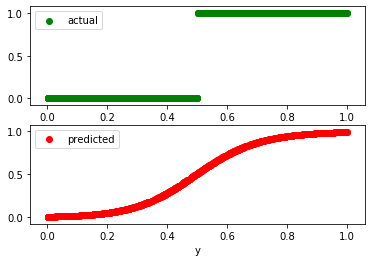

In [180]:
## plot the results of training of a NN 
# using y and predicted y (py)

import matplotlib.pyplot as plt
# Let us see how well the nn worked
# Plot y and predicted value to see if they 
# match.

def plot_actual_pred(X,y,py):
    plt.figure(1)                # the first figure
    plt.subplot(211)             # the first subplot in the first figure
    plt.scatter(X.flatten(), y.flatten(), c='g',label='actual')
    plt.xlabel("actual")
    plt.legend(loc='upper left')
    plt.subplot(212)             # the second subplot in the first figure
    plt.scatter(X.flatten(), py.flatten(),c = 'r', label='predicted')
    plt.xlabel("x")
    plt.xlabel("y")
    plt.legend(loc='upper left')
    plt.show()

plot_actual_pred(X,y,run_once(X,y,0.9))

In [181]:
# calculate various metrics
# We have actual and predicted now.
actual = np.copy(y.flatten())
predicted = run_once(X,y,0.6).flatten()

# Now we determine the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actual,predicted)
print(cm)

from sklearn.metrics import accuracy_score
print(accuracy_score(actual, predicted))

from sklearn.metrics import f1_score
print(f1_score(actual, predicted))

from sklearn.metrics import precision_score
print(precision_score(actual, predicted))

from sklearn.metrics import recall_score
print(recall_score(actual, predicted))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [176]:
# grab the precision and recall only from running once
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def precision_recall(X,y,p):
    pr = run_once(X,y,p)
    actual = np.copy(y.flatten())
    predicted = np.copy(pr.flatten())
    return precision_score(actual, predicted), recall_score(actual,predicted)

precision = np.zeros(10)
recall = np.zeros(10)

print(precision_recall(X,y,0.1))
print(precision_recall(X,y,0.2))
print(precision_recall(X,y,0.3))
print(precision_recall(X,y,0.4))
print(precision_recall(X,y,0.5))

# Please go and plot the Precision/Recall curve



(0.8968692449355433, 1.0)
(0.9365384615384615, 1.0)
(0.9567779960707269, 1.0)
(0.9779116465863453, 1.0)
(0.9959100204498977, 1.0)


In [178]:
# Useful function 

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

print(perf_measure(actual, predicted))

# Use this function to now plot an ROC for the same problem



(476, 0, 513, 11)
